In [1]:
##importing the libraries
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##importing the dataset
dataset=pd.read_csv("Automobile_data.csv")

In [3]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
##Getting the datasets
dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
##Checking for null values
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
##checking for ?? in normalized-losses
dataset["normalized-losses"].loc[dataset["normalized-losses"]=="?"].count()

41

In [7]:
##compensating the ?? in normalized-losses
n=dataset["normalized-losses"].loc[dataset["normalized-losses"]!="?"]
nmean=n.astype(str).astype(int).mean()

In [8]:
dataset["normalized-losses"]=dataset["normalized-losses"].replace("?",nmean).astype(int)

In [9]:
dataset["normalized-losses"]

0      122
1      122
2      122
3      164
4      164
5      122
6      158
7      122
8      158
9      122
10     192
11     192
12     188
13     188
14     122
15     122
16     122
17     122
18     121
19      98
20      81
21     118
22     118
23     118
24     148
25     148
26     148
27     148
28     110
29     145
      ... 
175     65
176     65
177     65
178    197
179    197
180     90
181    122
182    122
183    122
184     94
185     94
186     94
187     94
188     94
189    122
190    256
191    122
192    122
193    122
194    103
195     74
196    103
197     74
198    103
199     74
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32

In [10]:
##finding the prices which doesnt have a numeric value
dataset["price"].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [11]:
##4 false values detected
dataset["price"].loc[dataset["price"].str.isnumeric()== False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [12]:
##compensating
price = dataset['price'].loc[dataset['price'] != '?']
pmean = price.astype(str).astype(int).mean()
dataset['price'] = dataset['price'].replace('?',pmean).astype(int)
dataset['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [13]:
dataset["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
5      15250
6      17710
7      18920
8      23875
9      13207
10     16430
11     16925
12     20970
13     21105
14     24565
15     30760
16     41315
17     36880
18      5151
19      6295
20      6575
21      5572
22      6377
23      7957
24      6229
25      6692
26      7609
27      8558
28      8921
29     12964
       ...  
175     9988
176    10898
177    11248
178    16558
179    15998
180    15690
181    15750
182     7775
183     7975
184     7995
185     8195
186     8495
187     9495
188     9995
189    11595
190     9980
191    13295
192    13845
193    12290
194    12940
195    13415
196    15985
197    16515
198    18420
199    18950
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [14]:
##cleaning the horsepower of an engine
dataset["horsepower"].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [19]:
h=dataset["horsepower"].loc[dataset["horsepower"]!="?"]

In [20]:
hmean=h.astype(str).astype(int).mean()

In [21]:
dataset["horsepower"]=dataset["horsepower"].replace("?",hmean).astype(int)

In [22]:
dataset["horsepower"].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [23]:
# Find out the number of invalid value
dataset['bore'].loc[dataset['bore'] == '?']

# Replace the non-numeric value to null and conver the datatype
dataset['bore'] = pd.to_numeric(dataset['bore'],errors='coerce')
dataset.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

## Univariate Analysis

In [24]:
##vehicles by make analysis


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

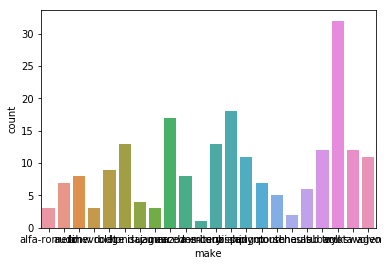

In [30]:
sns.countplot(dataset["make"])## not clear lets take top 10 values

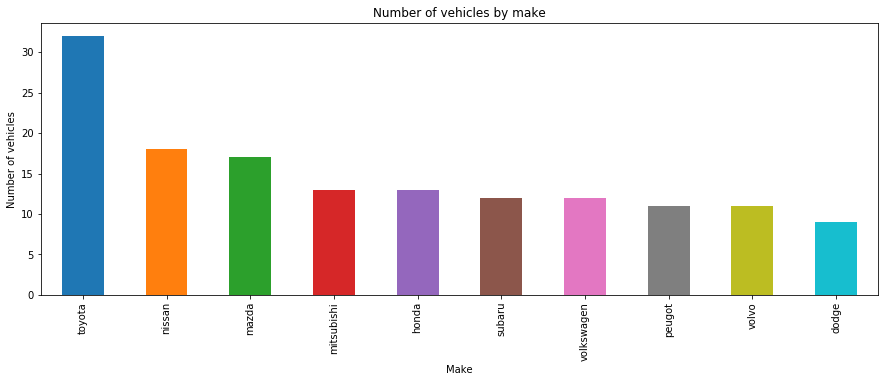

In [31]:
dataset.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

In [32]:
##insurance risk histogram


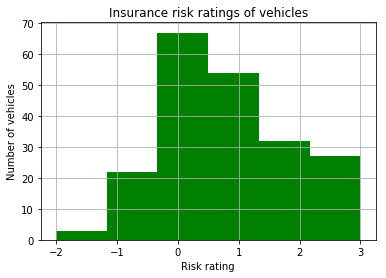

In [33]:
dataset.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

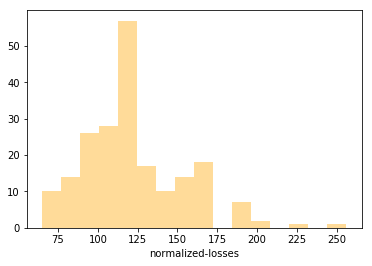

In [36]:
##histogram on normalized-losses
sns.distplot(dataset["normalized-losses"],kde=False,color='orange')

# Fuel type bar chart¶

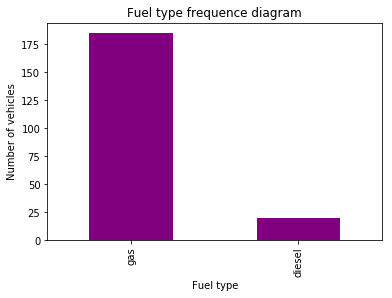

In [37]:
dataset['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');


# Fuel type pie diagram

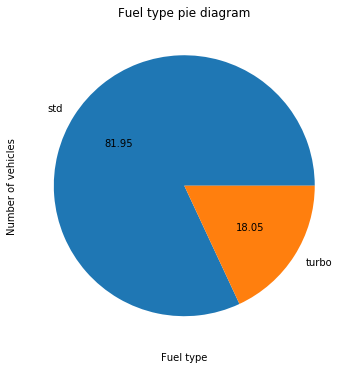

In [38]:
dataset['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');


#  Horsepower Histogram

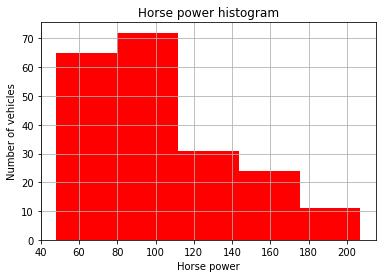

In [40]:
dataset.horsepower[np.abs(dataset.horsepower-dataset.horsepower.mean())<=(3*dataset.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

# Curb weight histogram

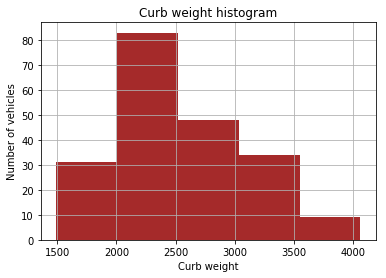

In [41]:
dataset['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

# Drive wheels bar chart

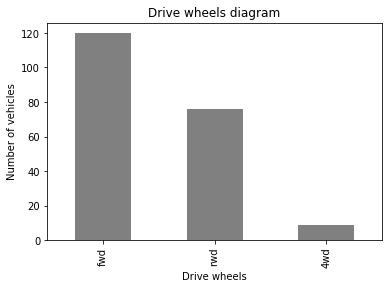

In [42]:
dataset['drive-wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');


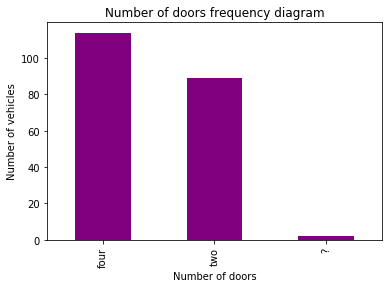

In [44]:
##Number of doors bar chart
dataset['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

### Correlation Analysis
Findings: There are some good inferences we can take it from the correlation heat map.

Price is more correlated with engine size and curb weight of the car
Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car
Wheel base is highly correlated with length and width of the car
Symboling and normalized car are correlated than the other fields

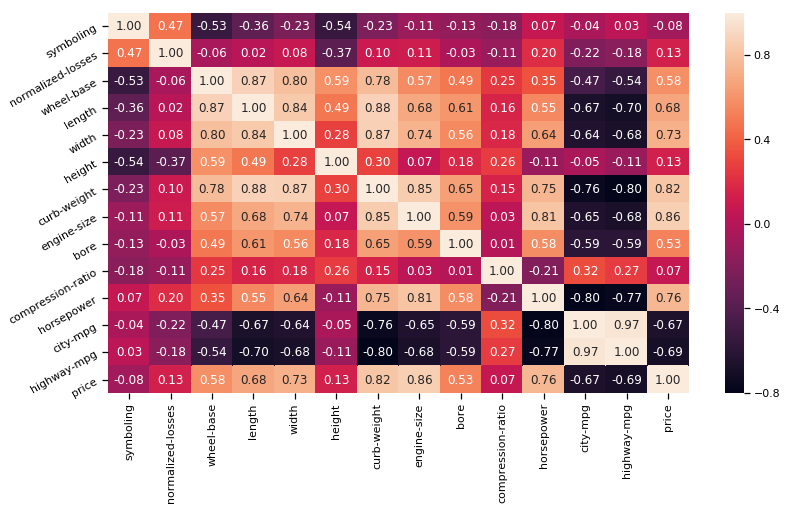

In [46]:
import seaborn as sns
corr = dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Bivariate Analysis

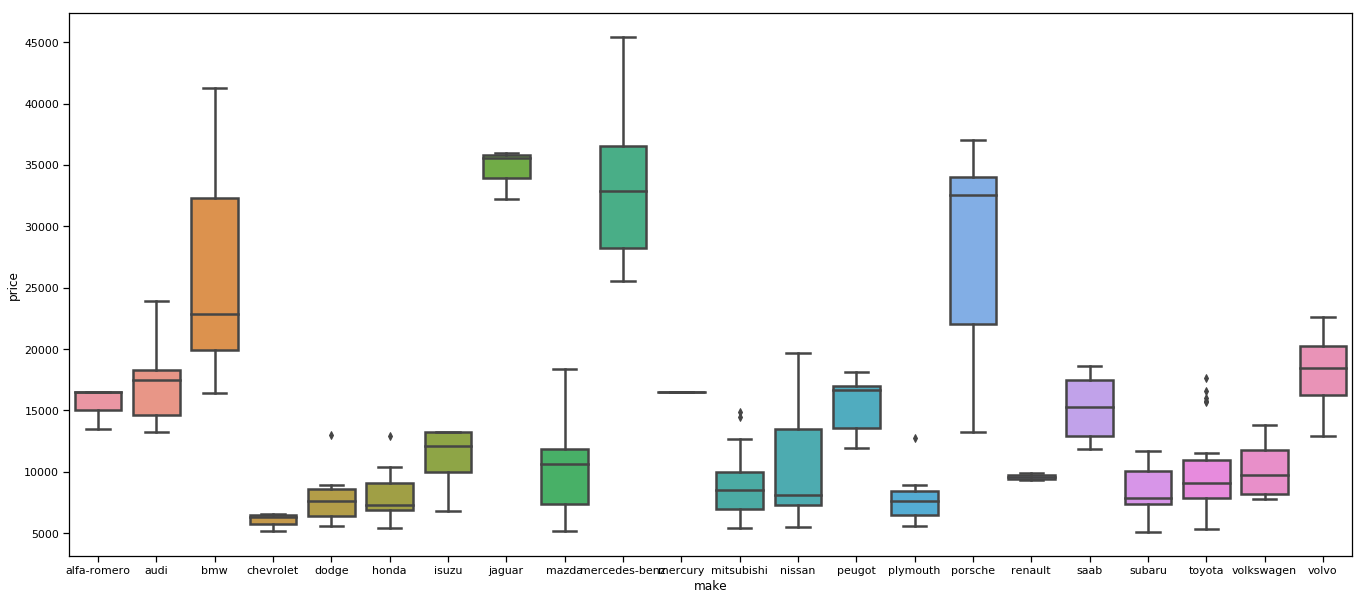

In [47]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=dataset)

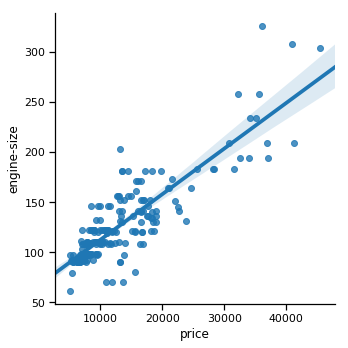

In [48]:
g = sns.lmplot('price',"engine-size", dataset);


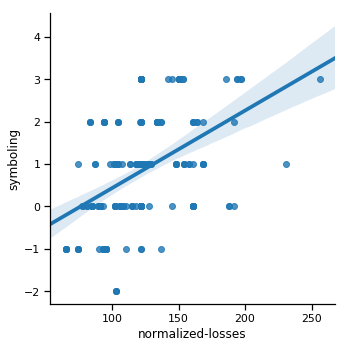

In [50]:
####Findings: From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss. It looks like the negative ratings are better for the car which has lesser losses.

g = sns.lmplot('normalized-losses',"symboling", dataset);

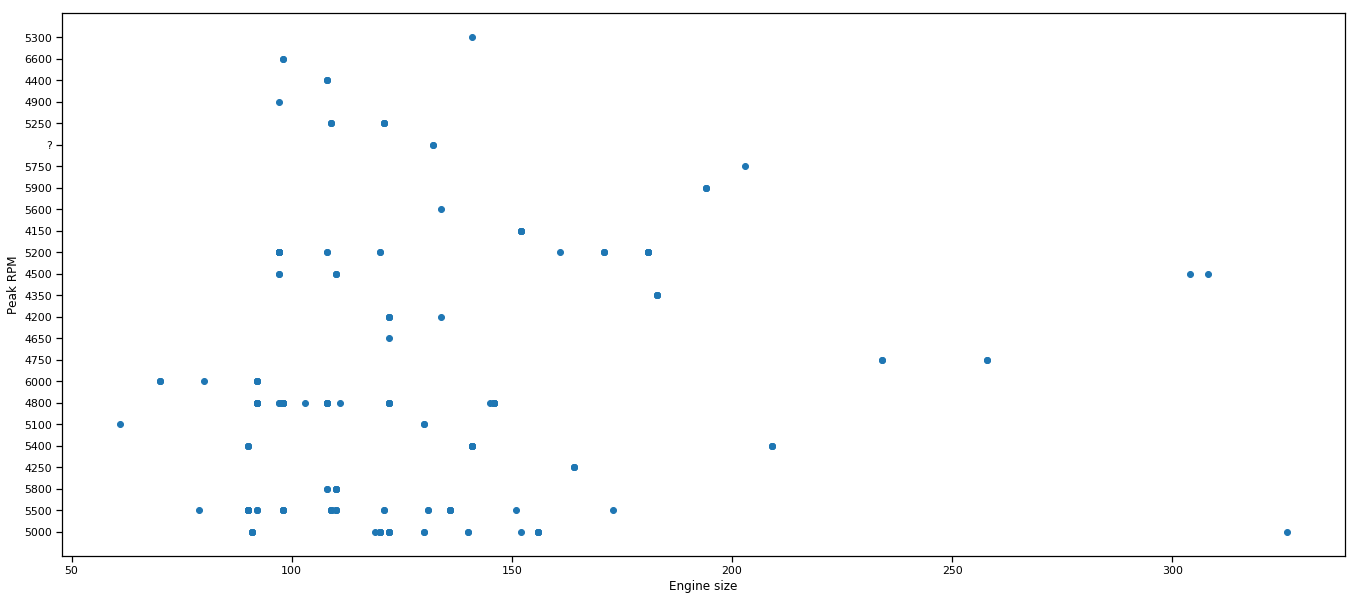

In [52]:
##Scatter plot of Engine size and Peak RPM
plt.scatter(dataset['engine-size'],dataset['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

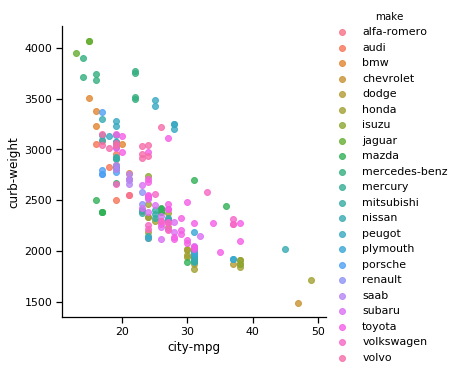

In [54]:
##Scatter plot of City and Highway MPG, Curb weight based on Make of the car
##Based on the scatter plot and the provided data set, it is clear that for both city and highway mileage of the automobile is inversely proportional to the curb weight.

##Heavier the Automobile less is the mileage for both City and Highway

g = sns.lmplot('city-mpg',"curb-weight", dataset, hue="make", fit_reg=False)

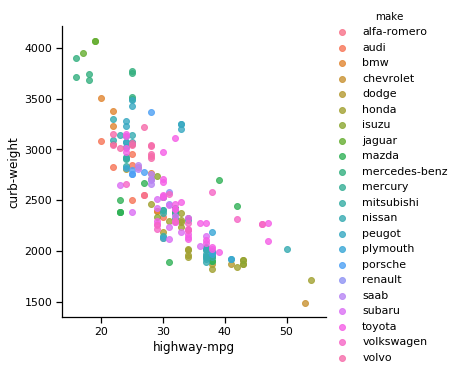

In [55]:
g = sns.lmplot('highway-mpg',"curb-weight", dataset, hue="make",fit_reg=False);


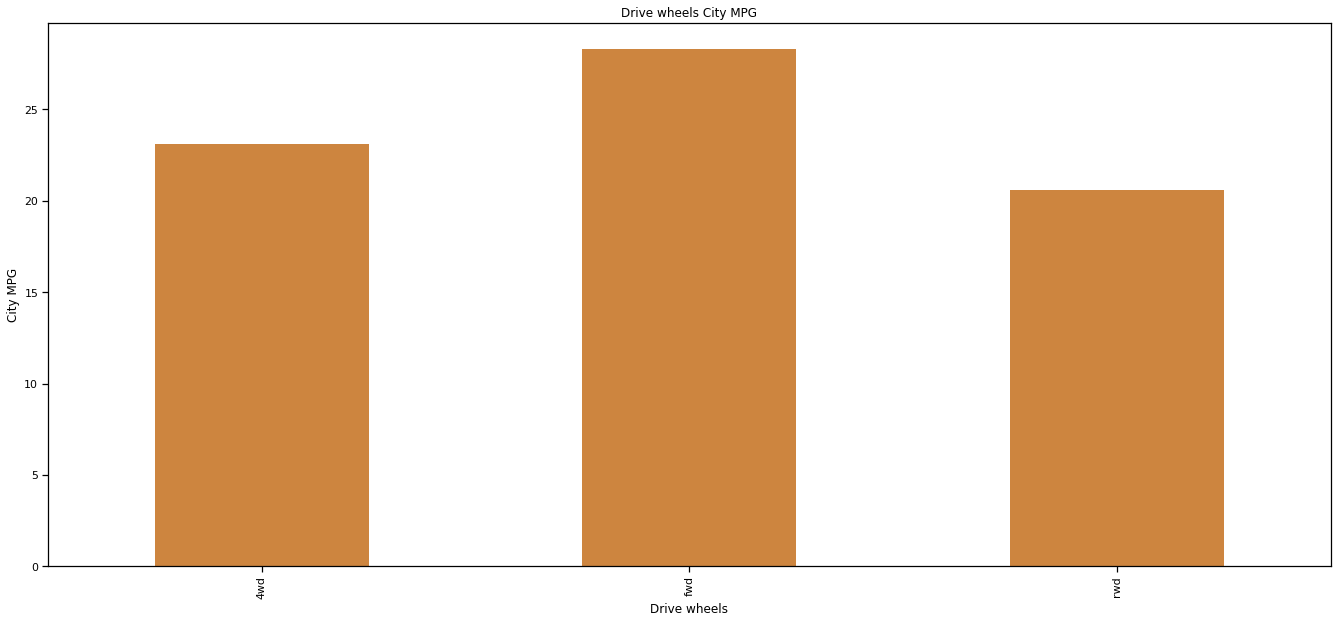

In [56]:
##Drive wheels and City MPG bar chart
dataset.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

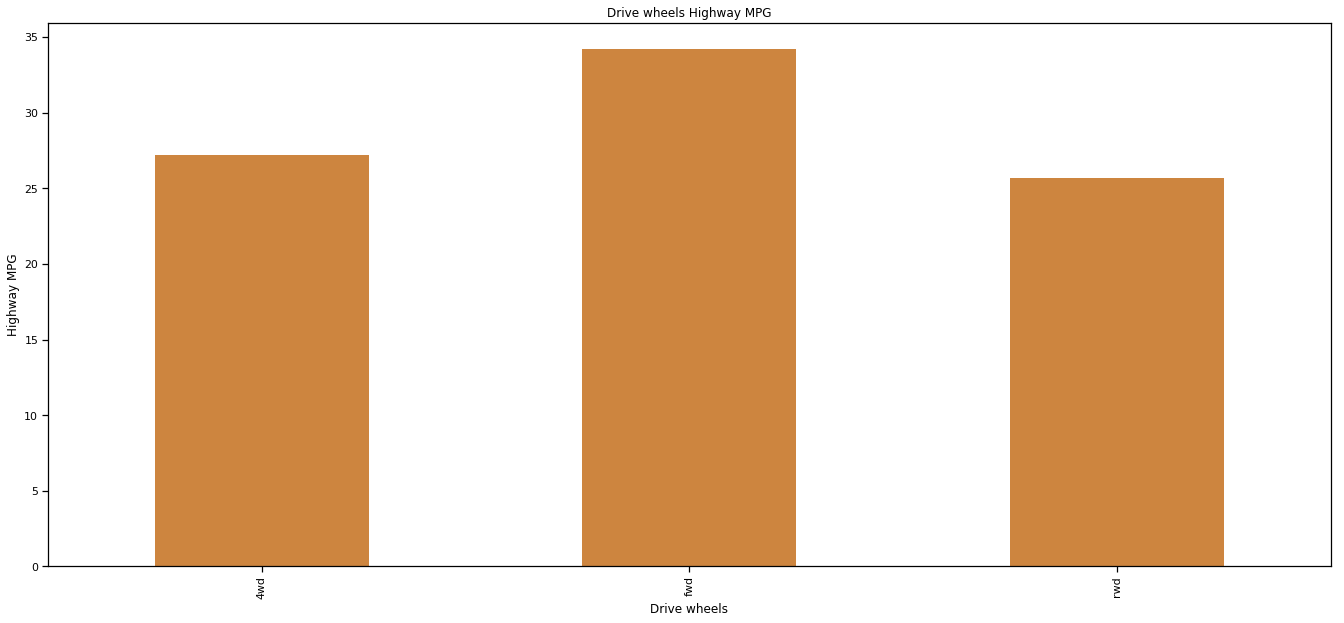

In [57]:
##Drive wheels and Highway MPG bar chart
dataset.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

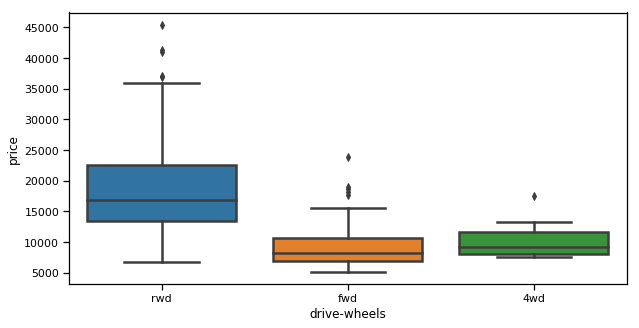

In [58]:
##Boxplot of Drive wheels and Price
##Findings: It's very evident that the Real wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.

plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=dataset)

Normalized losses based on body style and no. of doors
Findings: As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features of the cars which includes body style and no. of doors. Normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars.

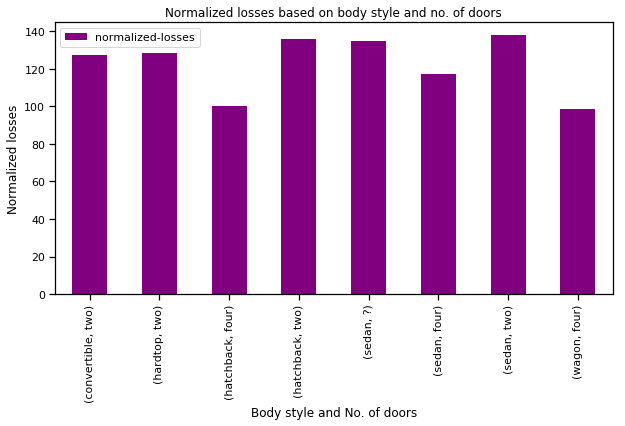

In [59]:
pd.pivot_table(dataset,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

### Conclusion
Analysis of the data set provides

How the data set are distributed
Correlation between different fields and how they are related
Normalized loss of the manufacturer
Symboling : Cars are initially assigned a risk factor symbol associated with its price
Mileage : Mileage based on City and Highway driving for various make and attributes
Price : Factors affecting Price of the Automobile.
Importance of drive wheels and curb weight